In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('OTD_Raw.csv')
df.head()

,Transport Name,Customer Name,Shipping Point,Shipment Number,Ship To Address,Truck Plate,Product Name,Logon Number,Driver Name,First Weighing date,...,Night Driving,Ring,Region,Customer Type,Quantity,Safety Violation,Dispatch Date.1,Truck Plate.1,Delivery Time (In Hours),OTD (IN %)
0,JOZA GLOBAL LOGISTIC LTD,JUDE C. MATHIAS,ABA DEPOT,33652001335,"170, AROCHUKWU ROAD 170 (OHAFIA)",AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68211271,0,4/3/2020 13:51,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/3/2020,AAA827YA,3.43,14.28%
1,JOZA GLOBAL LOGISTIC LTD,JUDE C. MATHIAS,ABA DEPOT,33652001334,"170, AROCHUKWU ROAD 170 (OHAFIA)",AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68220143,0,4/2/2020 14:13,...,YES,Ring 1,East,Trade,20.0,NO VIOLATION,4/2/2020,AAA827YA,5.56,23.19%
2,JOZA GLOBAL LOGISTIC LTD,INFOR & BROS NIGERIA LIMITED,ABA DEPOT,33652001342,6 OJIKE/GROTZ LANE,AAA827YA,CEM II /B-L 32.5R - CLASSIC-50KG BAG K2,68232156,0,4/8/2020 11:56,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/8/2020,AAA827YA,4.08,16.99%
3,JOZA GLOBAL LOGISTIC LTD,GLOJOESAM INVESTMENT LTD,ABA DEPOT,33652001360,Uratta Timber Market,AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68243931,0,4/14/2020 15:56,...,NO,Ring 1,East,Trade,20.0,NO VIOLATION,4/14/2020,AAA827YA,1.12,4.69%
4,JOZA GLOBAL LOGISTIC LTD,VUNIC GLOBAL CONNECT SERVICES,ABA DEPOT,33652001396,OLD EXPRESS ROAD ABA 48 (ABA),AAA827YA,CEM II /A-L 42.5N - SUPASET-50KG BAG K2,68248457,0,4/15/2020 15:45,...,NO,Ring 1,East,Trade,20.0,VIOLATED,4/15/2020,AAA827YA,50.48,210.32%


In [5]:
df.columns.values

array(['Transport Name', 'Customer Name', 'Shipping Point',
       'Shipment Number', 'Ship To Address', 'Truck Plate',
       'Product Name', 'Logon Number', 'Driver Name',
       'First Weighing date', 'Dispatch Date', 'Arrival Date And Time',
       'Night Driving', 'Ring', 'Region', 'Customer Type', 'Quantity',
       'Safety Violation', 'Dispatch Date.1', 'Truck Plate.1',
       'Delivery Time (In Hours)', 'OTD (IN %)'], dtype=object)

In [6]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_corr=df_corr.loc[(df_corr['level_0']=='Delivery Time (In Hours)') & (df_corr['level_0']!=df_corr['level_1'])]
df_corr.columns = ['Target Feature', 'Input Features', 'Correlation Value']
df_corr.reset_index(inplace=True)
df_corr.drop('index', axis=1)

C:\Users\babat\AppData\Local\Temp\ipykernel_6564\304609526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()


,Target Feature,Input Features,Correlation Value
0,Delivery Time (In Hours),Logon Number,0.003455
1,Delivery Time (In Hours),Quantity,0.293149
2,Delivery Time (In Hours),Shipment Number,0.314599


<Axes: ylabel='Product Name'>

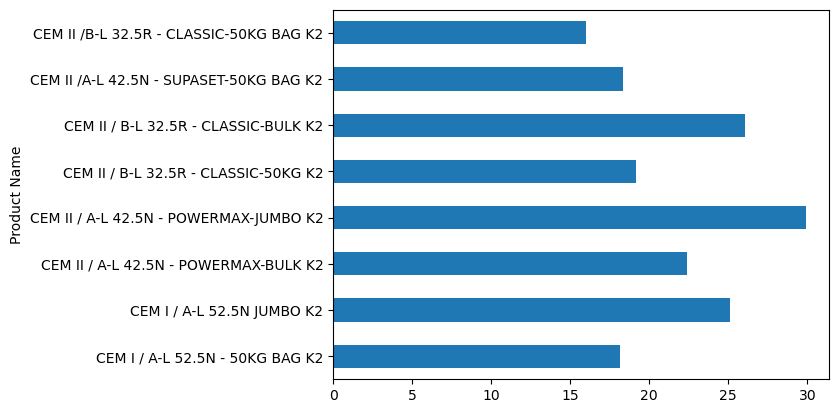

In [13]:
df.groupby(['Product Name'])['Delivery Time (In Hours)'].mean().plot(kind = 'barh')

<Axes: xlabel='Total Quantity Supplied', ylabel='Product Name'>

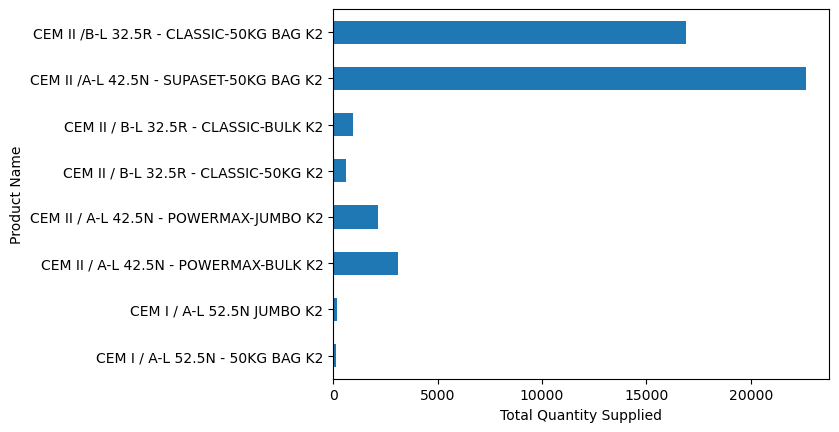

In [11]:
df.groupby(['Product Name'])['Quantity'].sum().plot(kind = 'barh', xlabel='Total Quantity Supplied')

In [16]:
df['Shipping Point'].unique()

array(['ABA DEPOT', 'Owerri Depot', 'MFA', 'PORT HARCOURT 2 DEPOT',
       'UYO DEPOT', 'PORT HARCOUT DEPOT', 'ENUGU DEPOT'], dtype=object)

### Bivariate Analysis on Shipping Point 

In [22]:
def show_hist(shipping_point= 'ABA DEPOT'):
    data = df[df['Shipping Point'] == shipping_point]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['Delivery Time (In Hours)'], kde=True, stat='probability')
    ax.set_title(f'Showing the Distribution of Delivery Time  From {shipping_point} Shipping Point')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

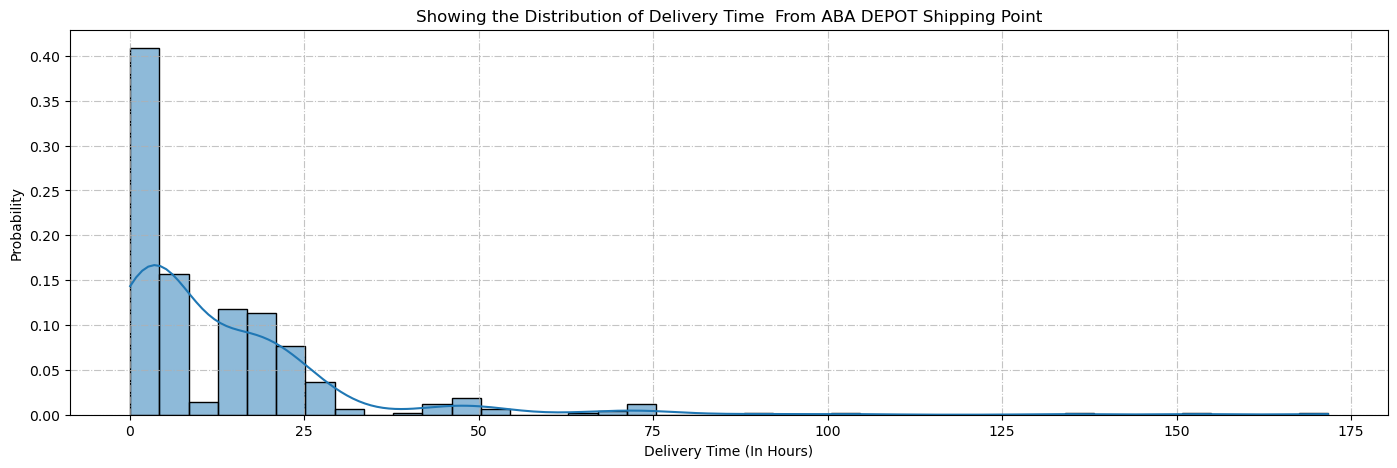

None


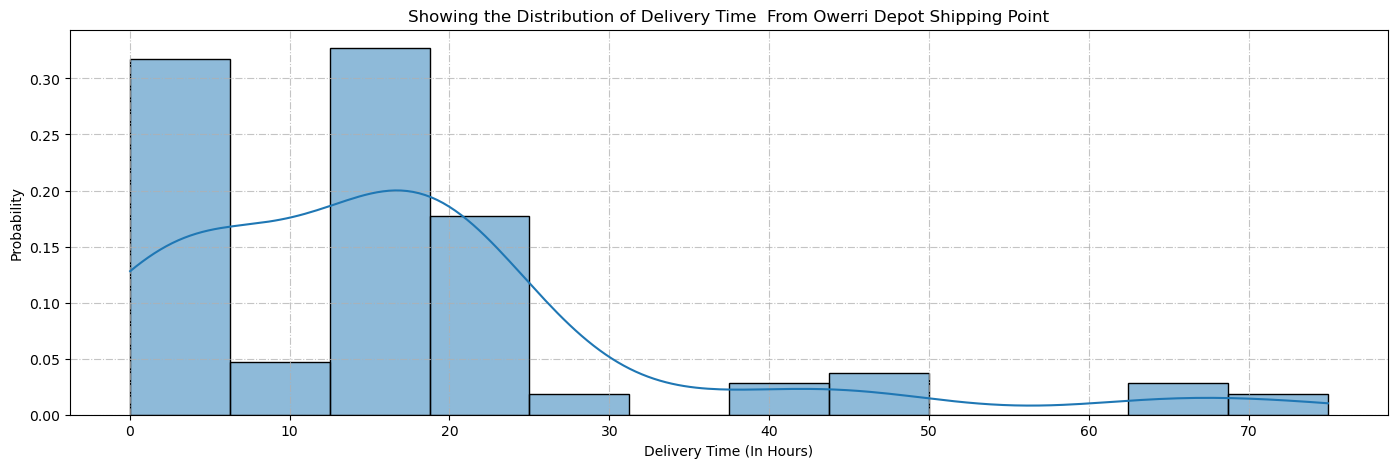

None


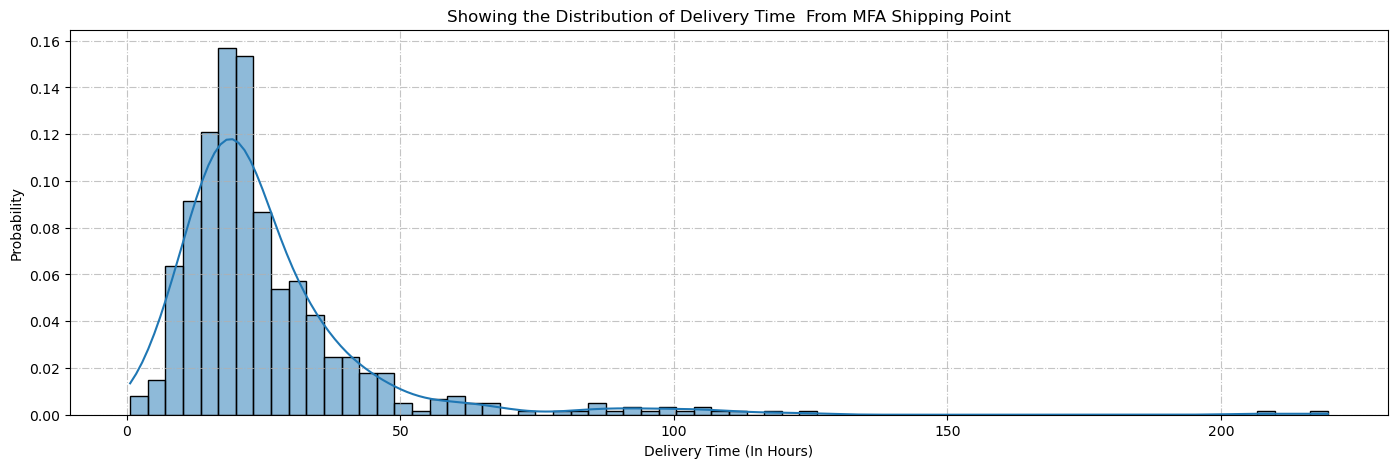

None


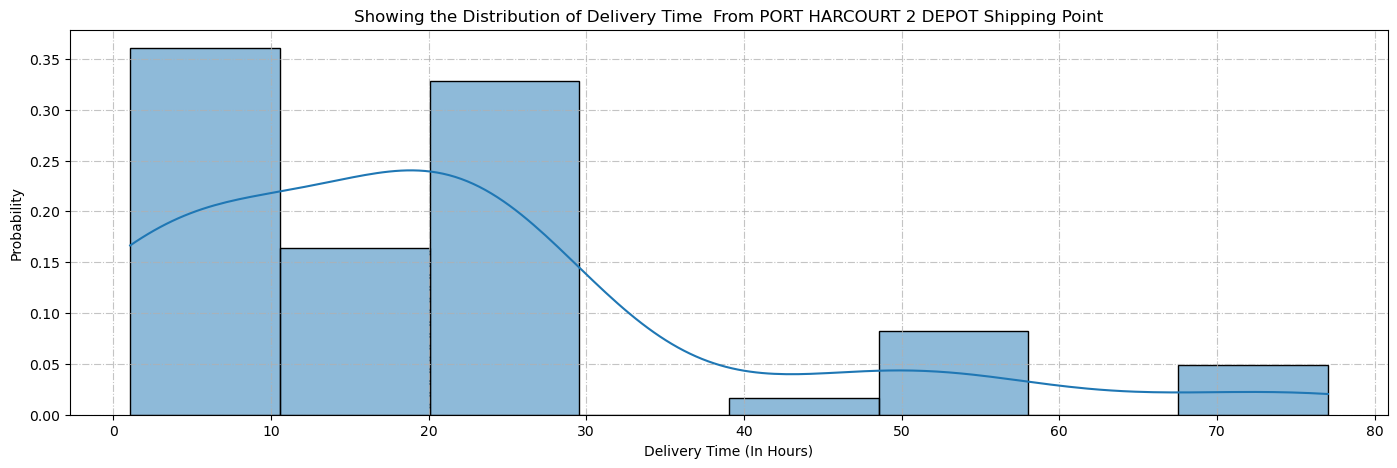

None


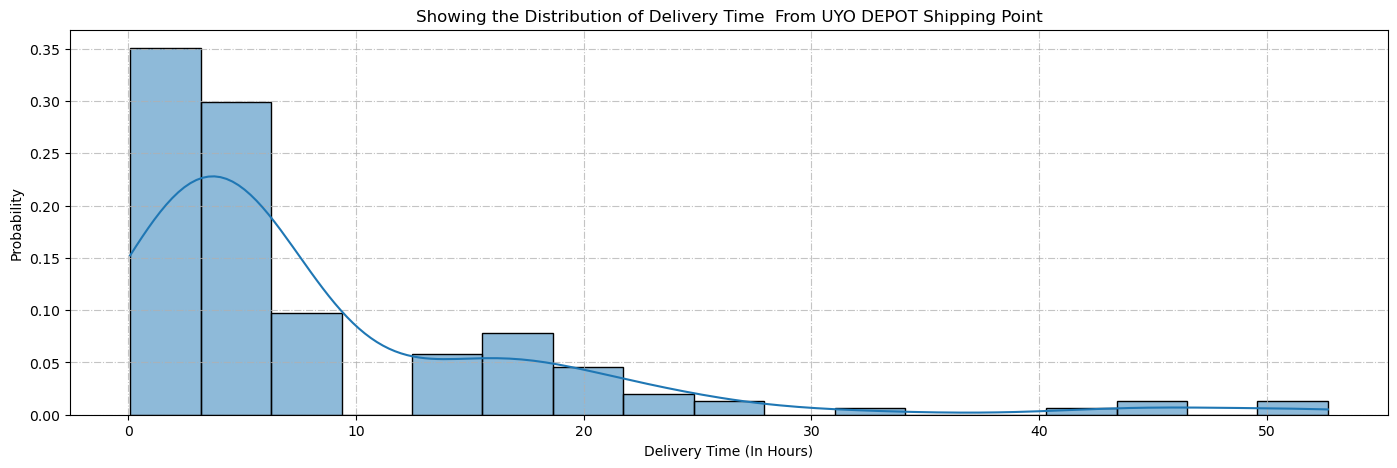

None


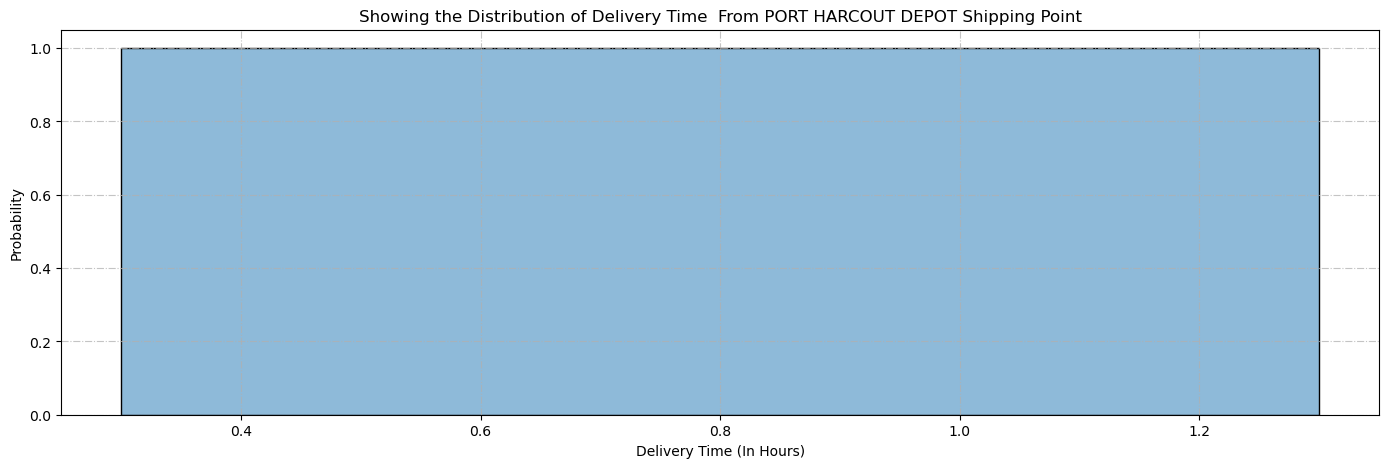

None


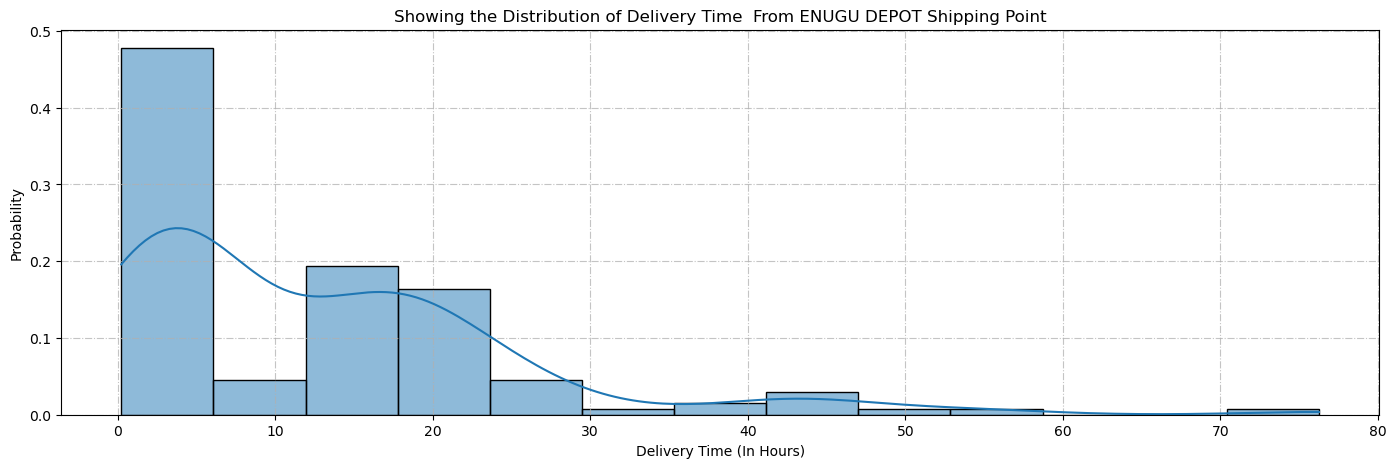

None


In [25]:
print(show_hist('ABA DEPOT'))
print(show_hist('Owerri Depot'))
print(show_hist('MFA'))
print(show_hist('PORT HARCOURT 2 DEPOT'))
print(show_hist('UYO DEPOT'))
print(show_hist('PORT HARCOUT DEPOT'))
print(show_hist('ENUGU DEPOT'))
